In [2]:
import re
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#import data

df_patents = pd.read_excel('patents.xlsx')
df_utils = pd.read_excel('utilization.xlsx')
df_faculty = pd.read_excel('faculty.xlsx')

## Patents

In [8]:
pat_aut = df_patents['Author'].str.split(';').explode().str.strip().value_counts().head(10)

In [9]:
#patent author count

pd.DataFrame(pat_aut).rename(index=str, columns={'Author':'Count'})

,Count
"Quindara, Hilda L.",27
"Mama-o, Joyce K.",25
"Botangen, Esther T.",24
"Belino, Pelin B.",21
"Somyden, Jao-Jao A.",21
"Gonzales, Ines C.",15
"Gabriel, Dominga E.",14
"Gonzales, Fernando R.",13
"Suanding, Ruda Fe A.",12
"Basatan, Johnabel T.",10


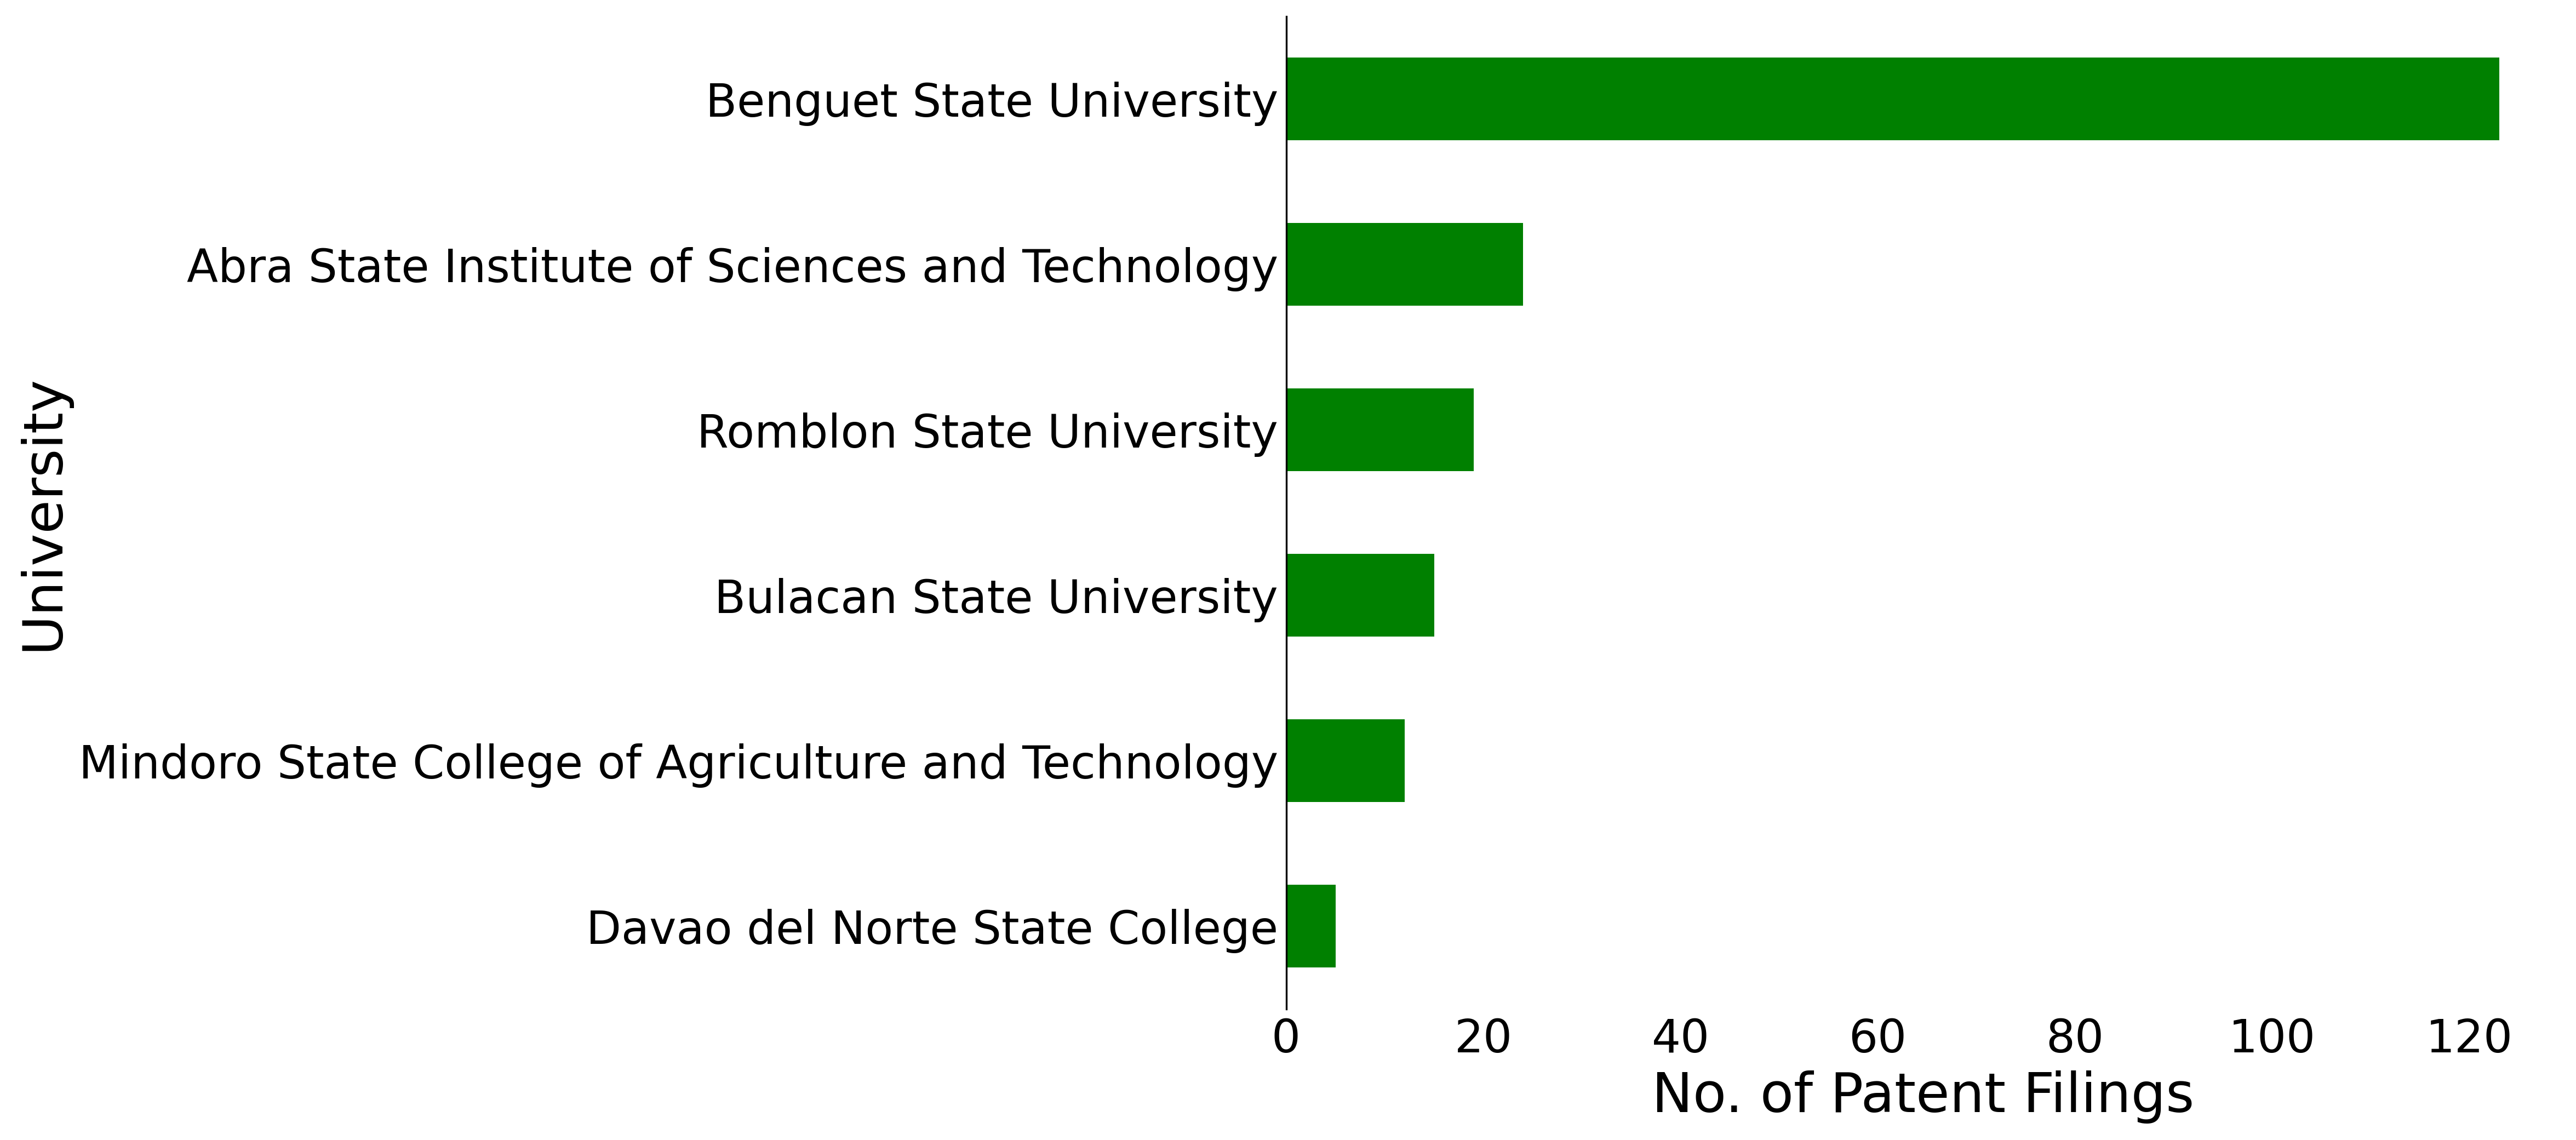

In [10]:
#university patent count

plt.figure(figsize=(10, 8), dpi=300)

top_patents = (df_patents.groupby('University')['Patent Filed']
               .count().sort_values(ascending=True).plot.barh(color='green'))

plt.tick_params(axis='both', which='both', length=0, labelsize=20)
plt.ylabel('University', fontsize=24)
plt.xlabel('No. of Patent Filings', fontsize=24)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.gca().spines.bottom.set_visible(False)
plt.show()

In [11]:
df_patents.groupby('University')['Patent Filed'].count()

University
Abra State Institute of Sciences and Technology         24
Benguet State University                               123
Bulacan State University                                15
Davao del Norte State College                            5
Mindoro State College of Agriculture and Technology     12
Romblon State University                                19
Name: Patent Filed, dtype: int64

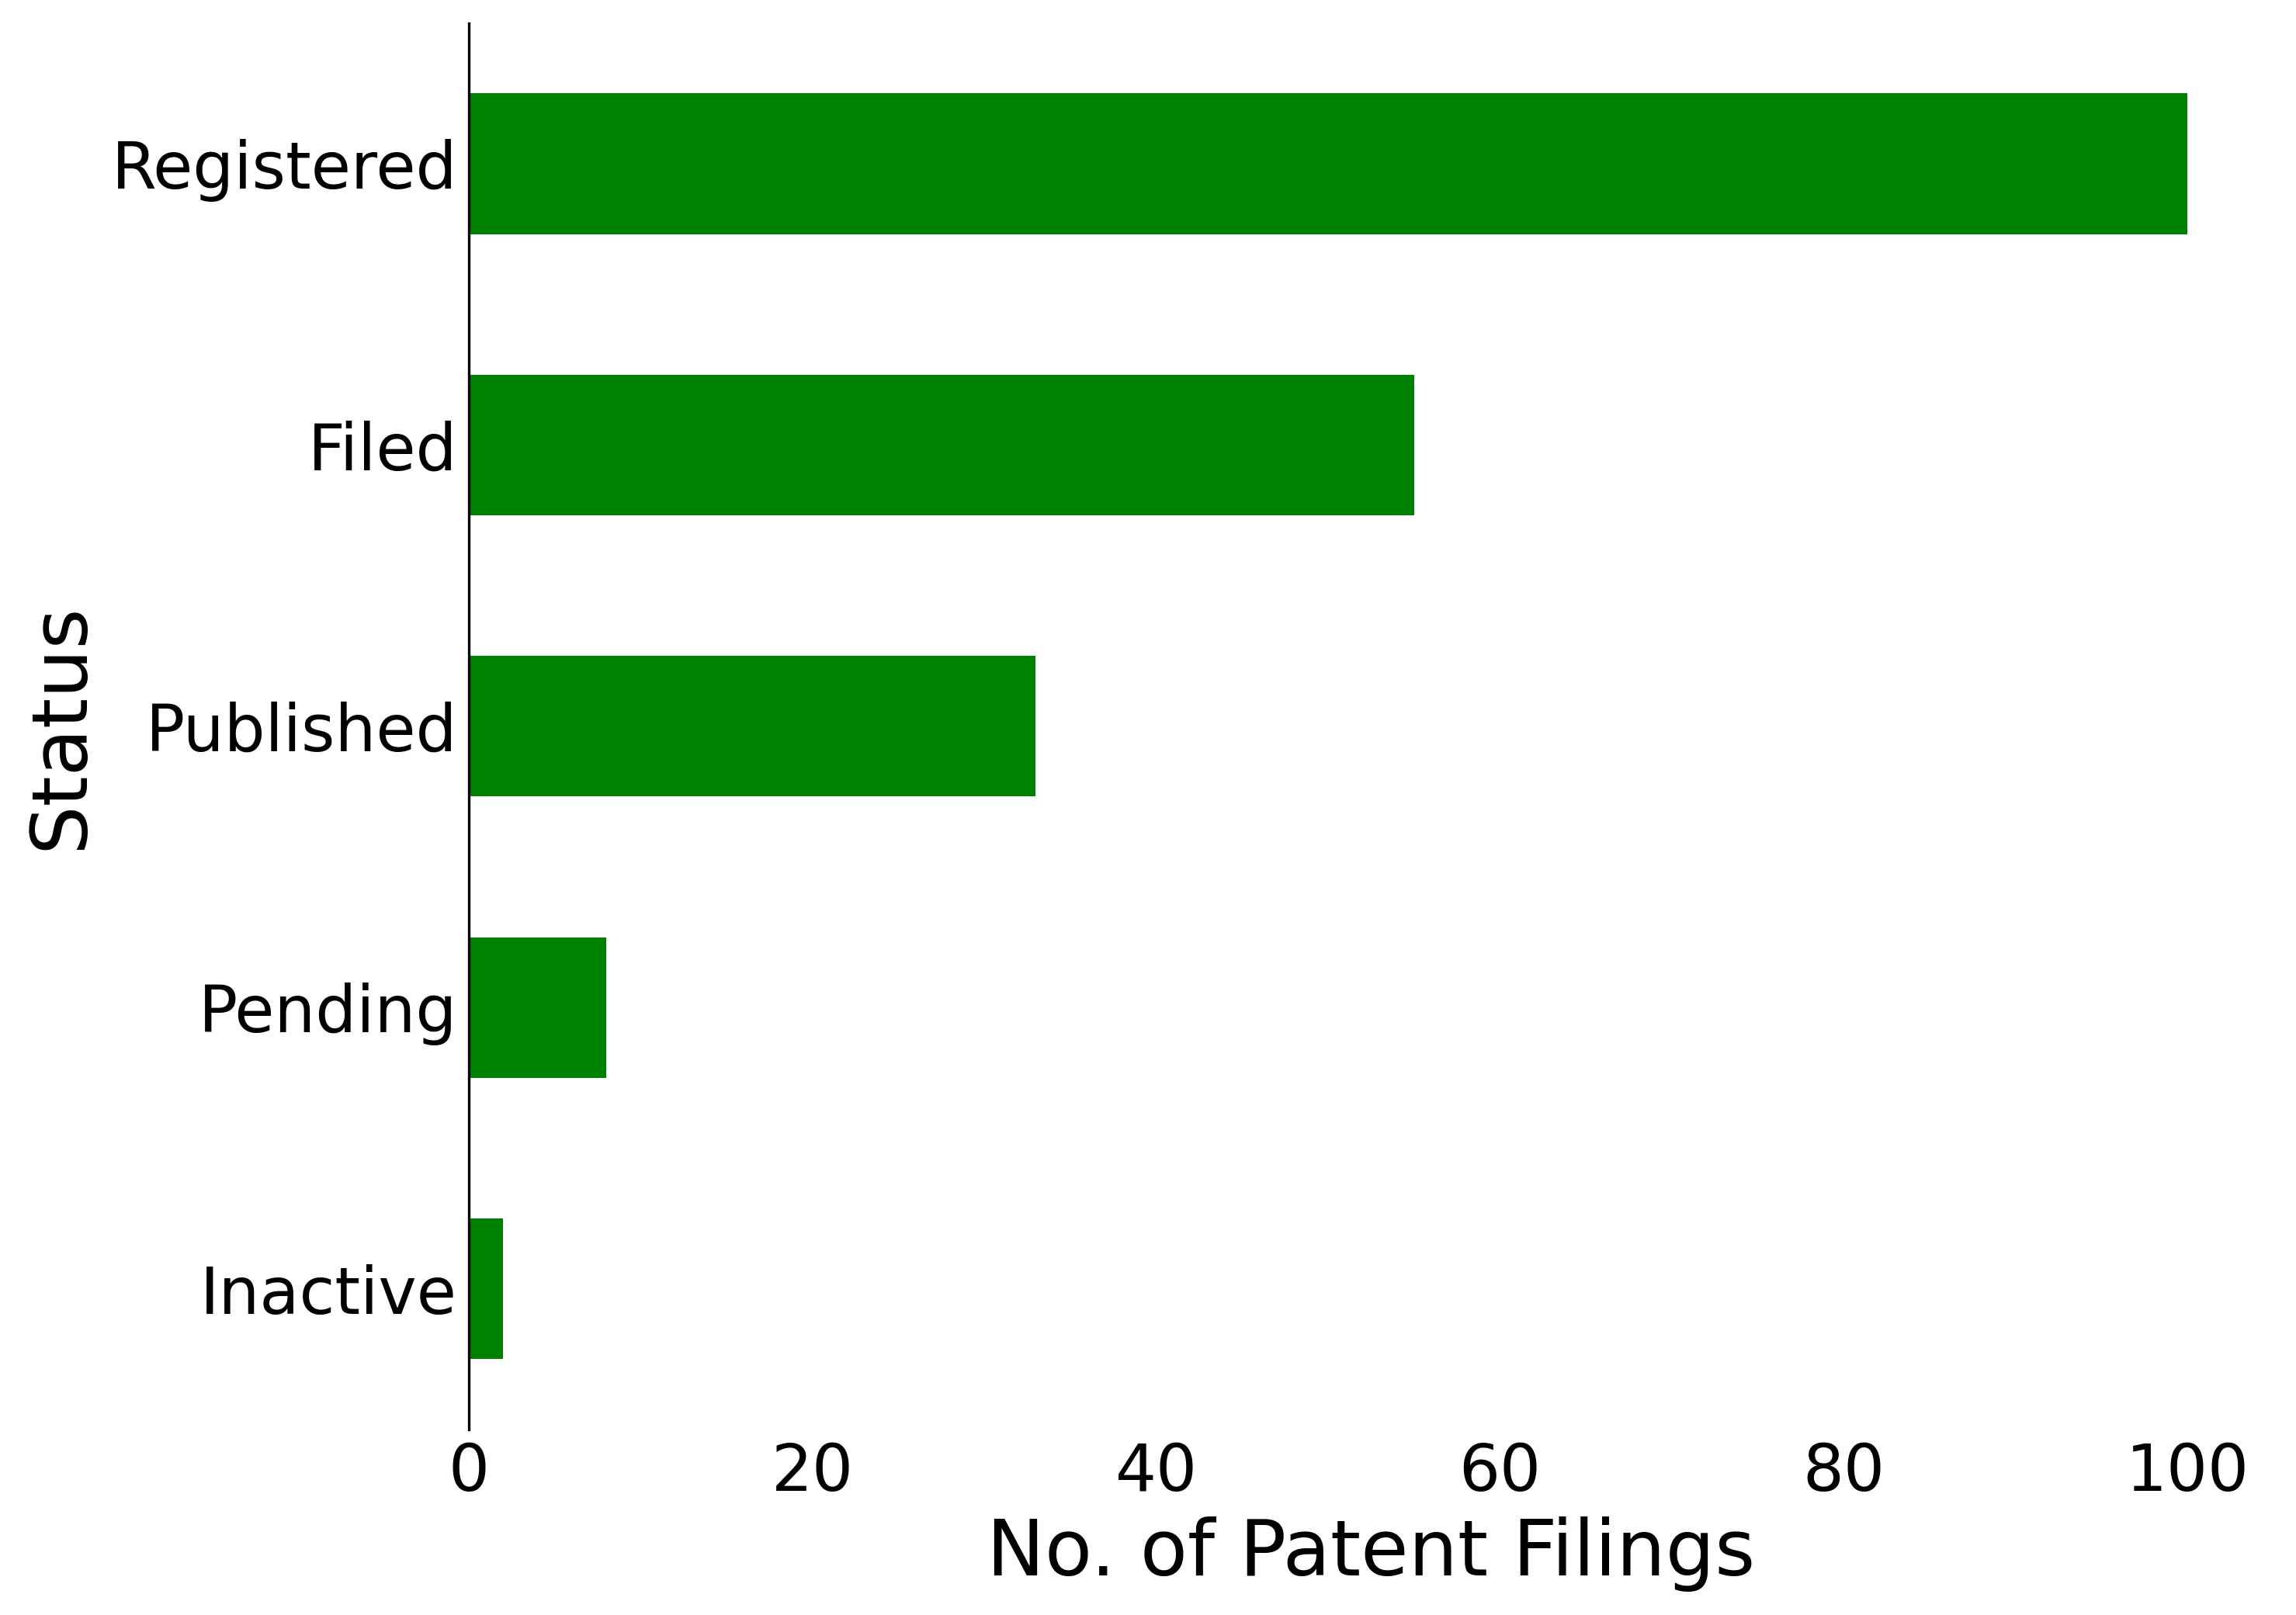

In [12]:
#patent status count

plt.figure(figsize=(10, 8), dpi=300)

df_patents['Patent Status'].value_counts().sort_values().plot.barh(color='green')

plt.tick_params(axis='both', which='both', length=0, labelsize=20)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.gca().spines.bottom.set_visible(False)
plt.ylabel('Status', fontsize=24)
plt.xlabel('No. of Patent Filings', fontsize=24)
plt.show()

In [13]:
df_patents['Patent Status'].value_counts()

Registered    100
Filed          55
Published      33
Pending         8
Inactive        2
Name: Patent Status, dtype: int64

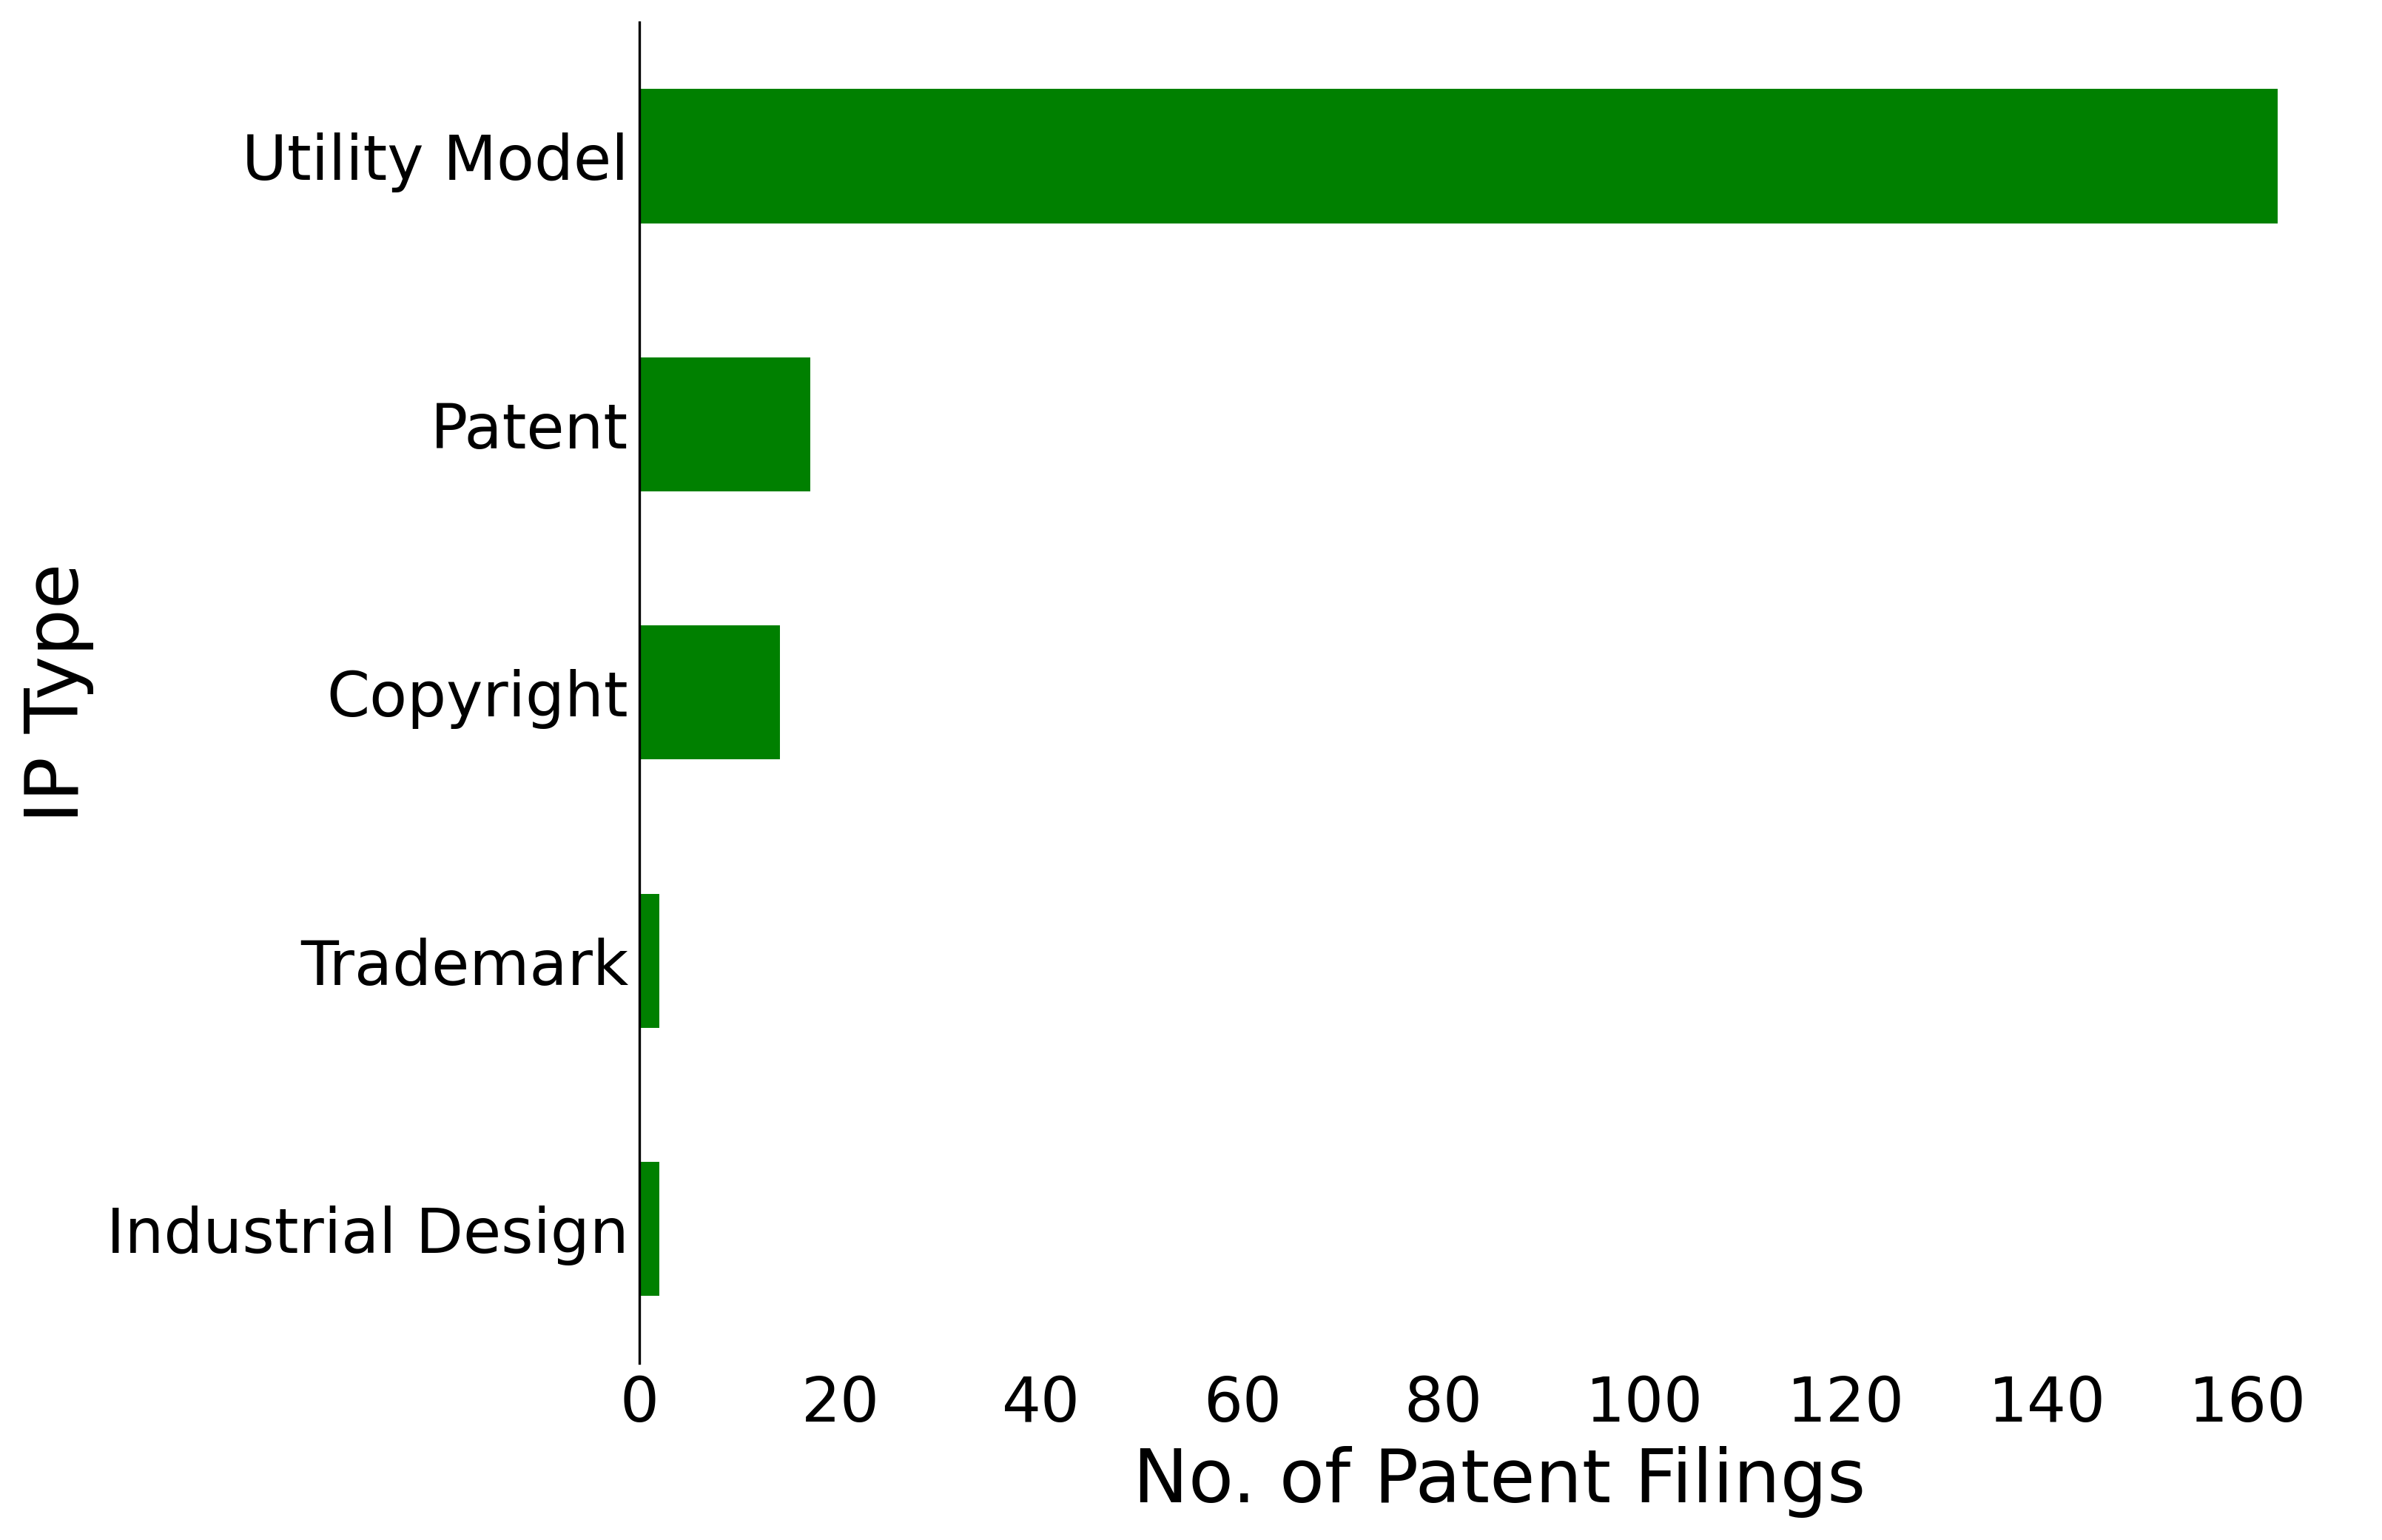

In [14]:
#patent type count

plt.figure(figsize=(10, 8), dpi=300)

df_patents['Patent Type'].value_counts().sort_values().plot.barh(color='green')

plt.tick_params(axis='both', which='both', length=0, labelsize=20)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.gca().spines.bottom.set_visible(False)
plt.ylabel('IP Type', fontsize=24)
plt.xlabel('No. of Patent Filings', fontsize=24)
plt.show()

In [15]:
df_patents['Patent Type'].value_counts()

Utility Model        163
Patent                17
Copyright             14
Industrial Design      2
Trademark              2
Name: Patent Type, dtype: int64

## Utilization

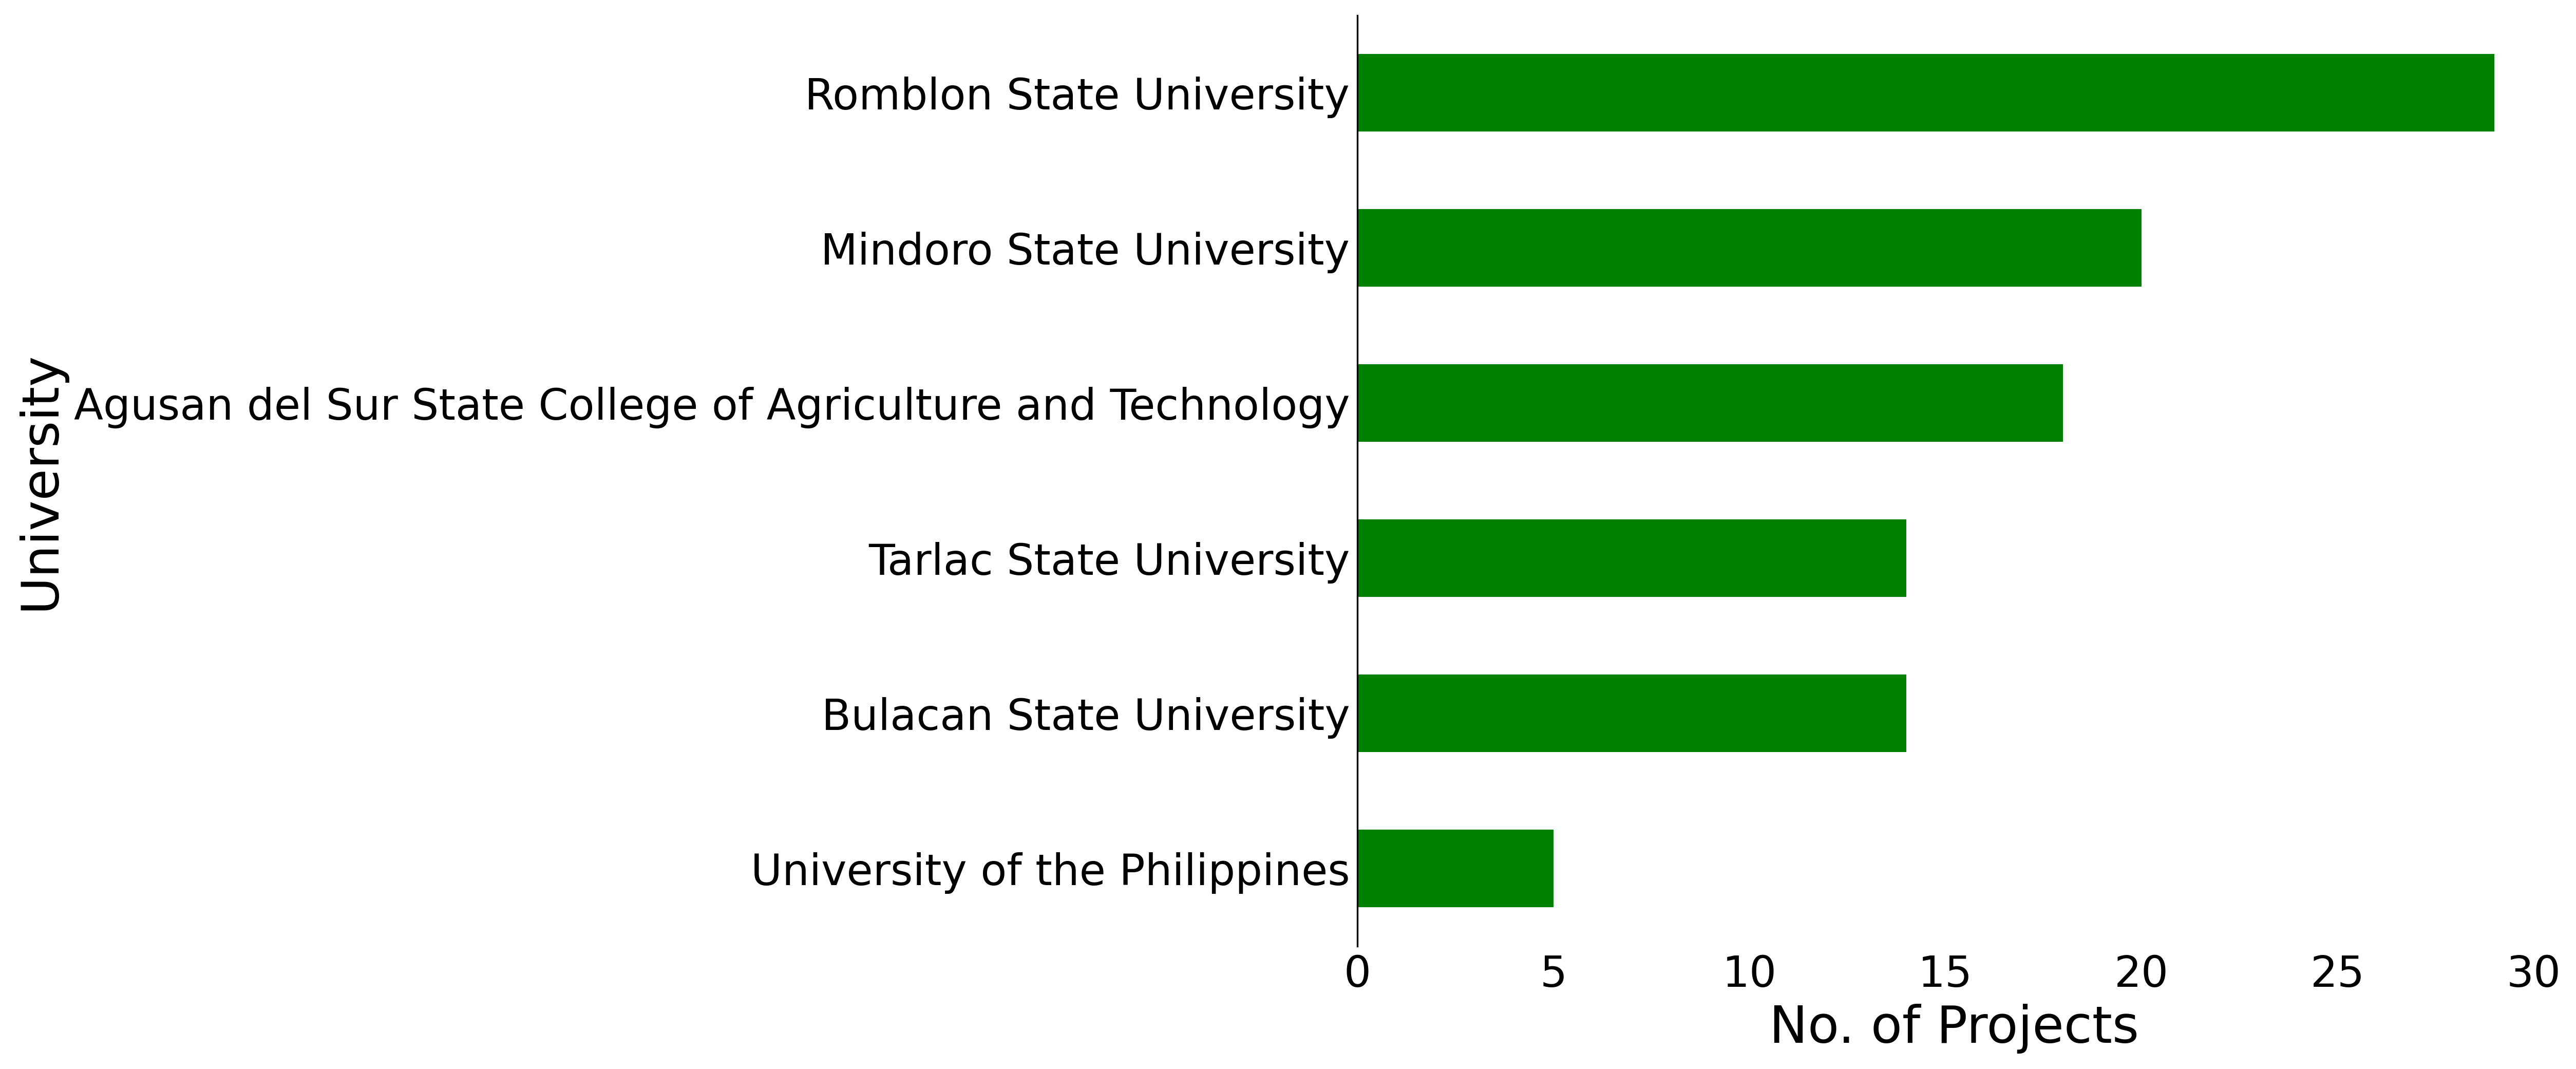

In [16]:
#university utilization project count

plt.figure(figsize=(10, 8), dpi=300)

(df_utils.groupby('University')['Product/Service']
 .count().sort_values(ascending=True).plot.barh(color='green'))

plt.tick_params(axis='both', which='both', length=0, labelsize=20)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.gca().spines.bottom.set_visible(False)
plt.ylabel('University', fontsize=24)
plt.xlabel('No. of Projects', fontsize=24)
plt.show()

In [17]:
df_utils.groupby('University')['Product/Service'].count()

University
Agusan del Sur State College of Agriculture and Technology    18
Bulacan State University                                      14
Mindoro State University                                      20
Romblon State University                                      29
Tarlac State University                                       14
University of the Philippines                                  5
Name: Product/Service, dtype: int64

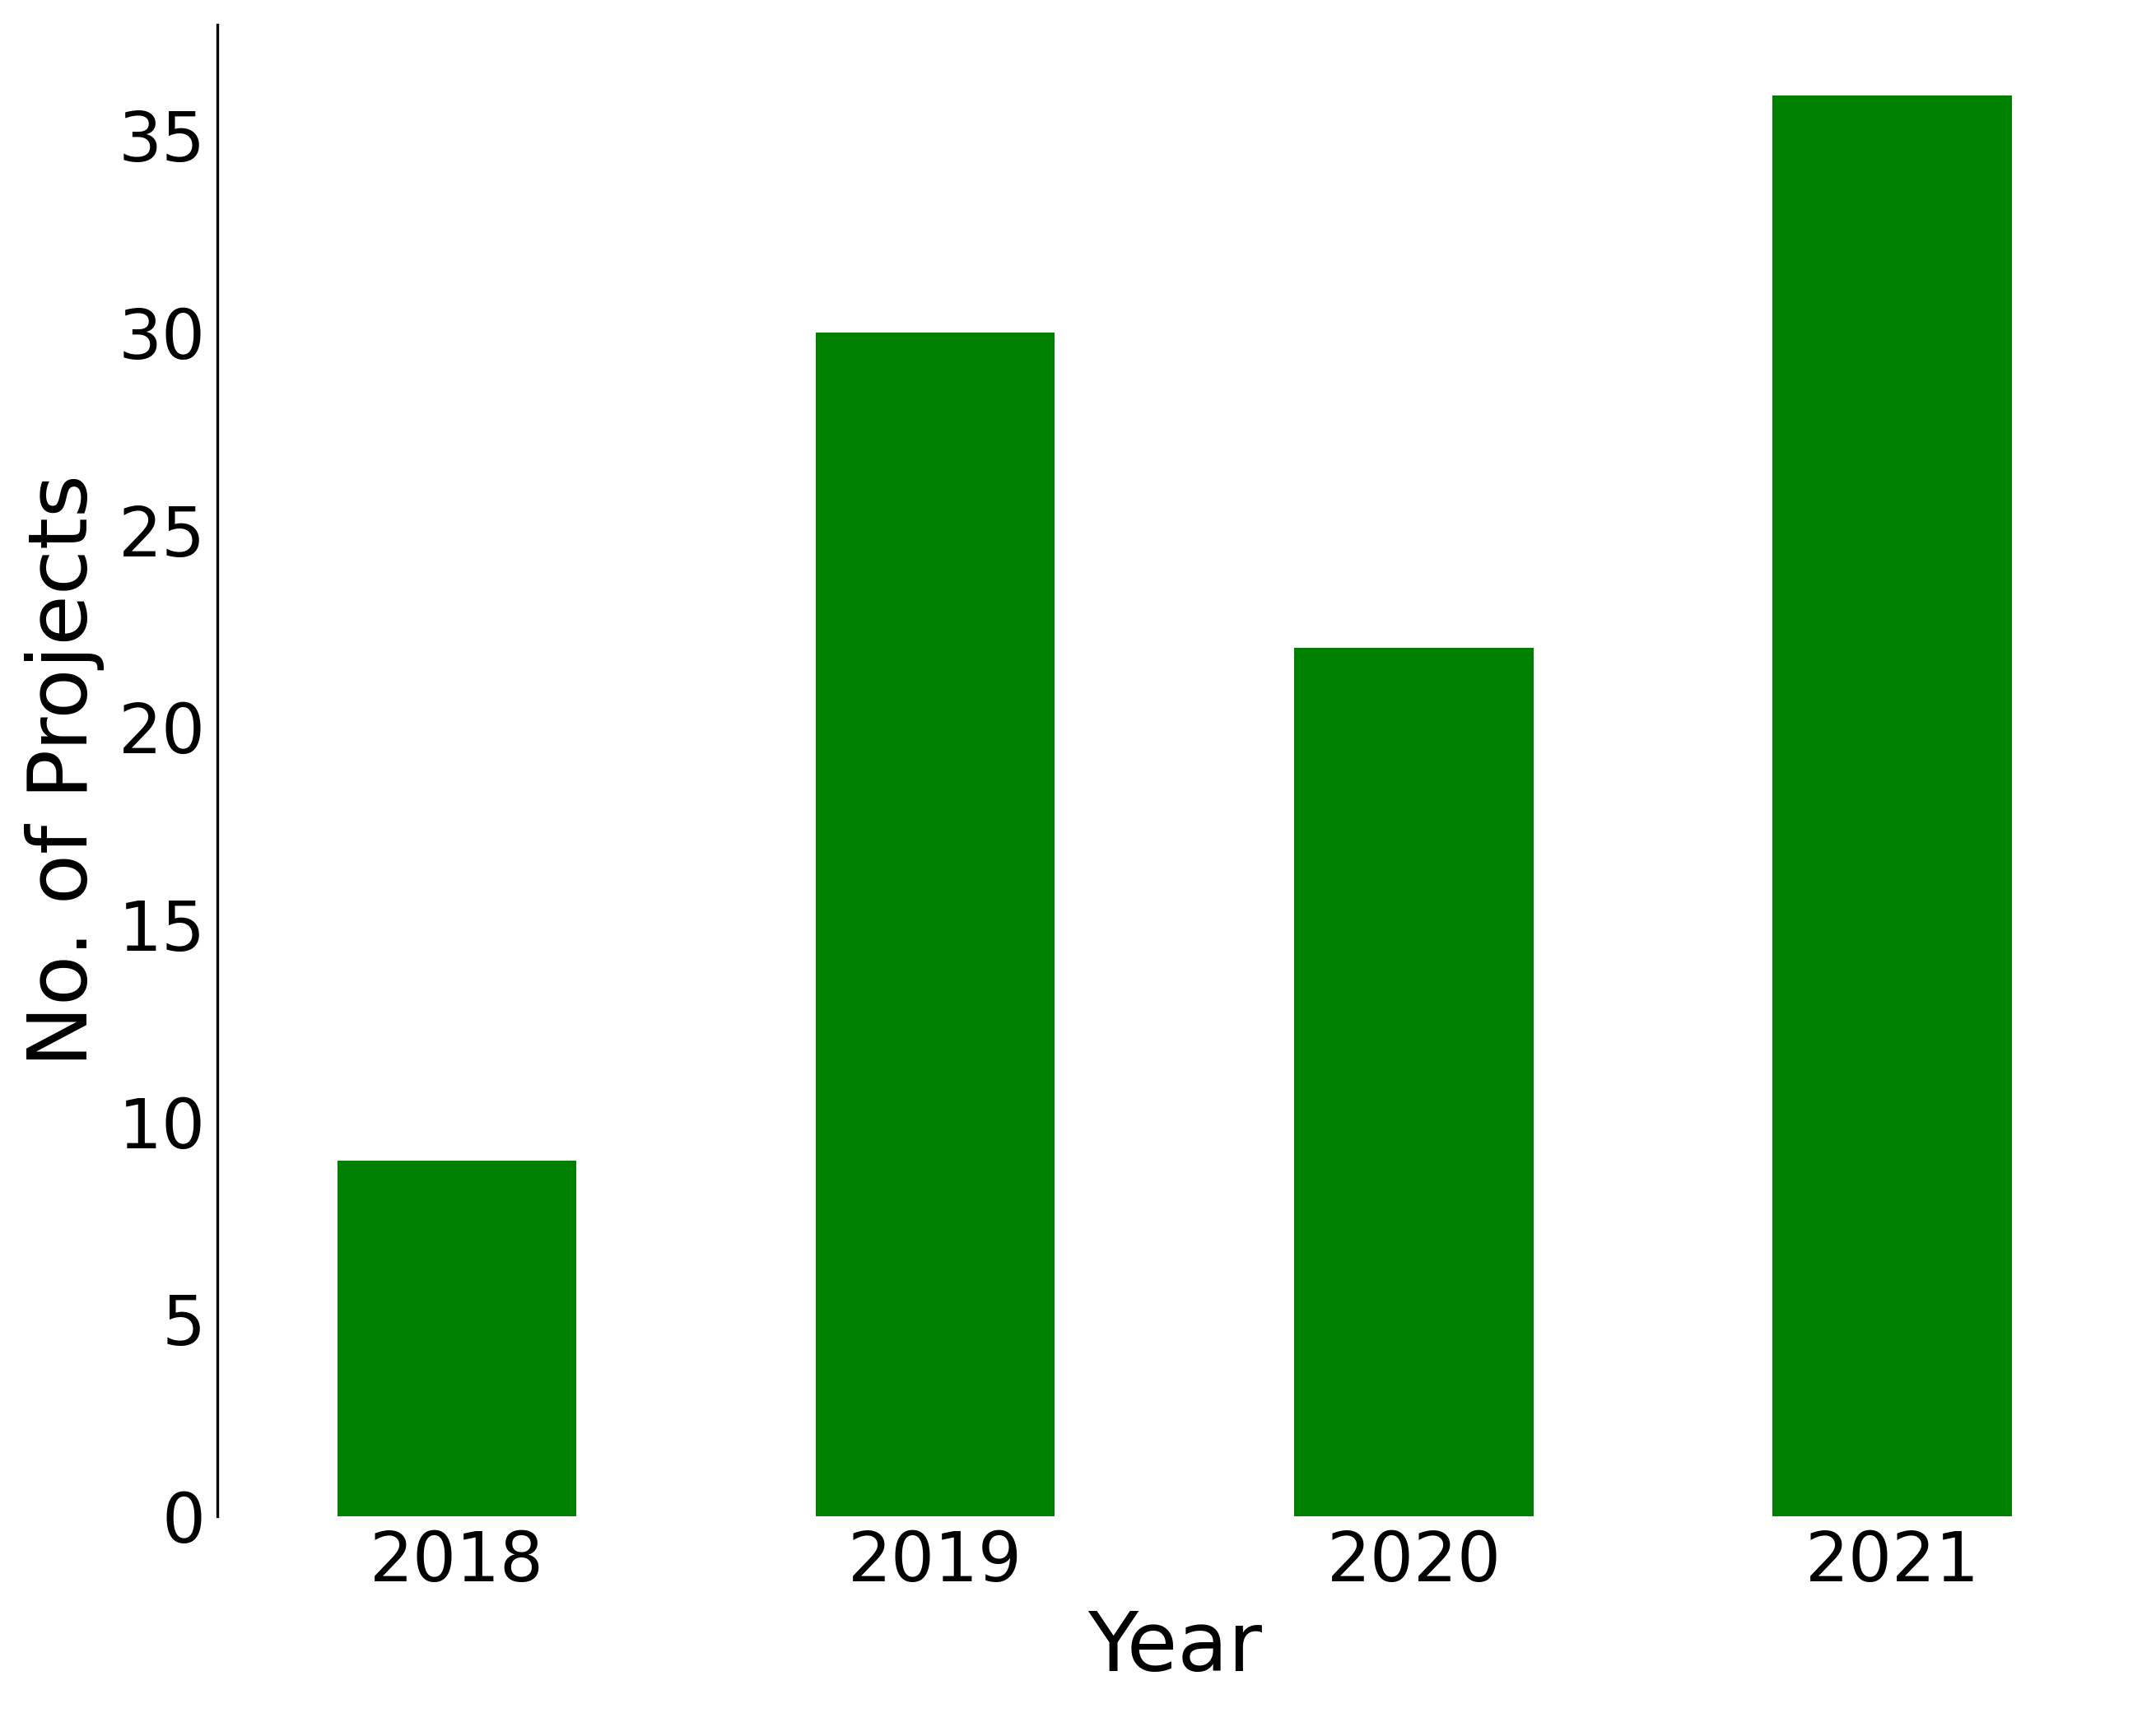

In [18]:
#yearly project count

plt.figure(figsize=(10, 8), dpi=300)

df_utils.groupby('Year')['Product/Service'].count()[1:].plot.bar(color='green')

plt.tick_params(axis='both', which='both', length=0, labelsize=20)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.gca().spines.bottom.set_visible(False)
plt.xticks(rotation=0)
plt.ylabel('No. of Projects', fontsize=24)
plt.xlabel('Year', fontsize=24)
plt.show()

In [19]:
ben = (df_utils['Beneficiary'].str.split(';').explode().str.split(',')
       .explode().str.split('and').explode().str.strip().value_counts()).head(10)

In [20]:
pd.DataFrame(ben).rename(index=str, columns={'Beneficiary':'Count'})

,Count
Calsanag Communities,9
RP Corpus Sales Enterprises,5
Farmers,5
VCDC Organic Farm,3
Women of Brgy. Imelda,3
Sta. Theresa Fish Processing Association,3
DepEd Mathematics Teachers,3
DepEd Science Teachers,2
Oriental Mindoro,2
Indigenous Communities,2


## Faculty

In [21]:
df_faculty['Educational Attainment'].value_counts()

Masteral Degree     516
Doctoral Degree     366
Bachelors Degree     87
Certificate           1
Name: Educational Attainment, dtype: int64

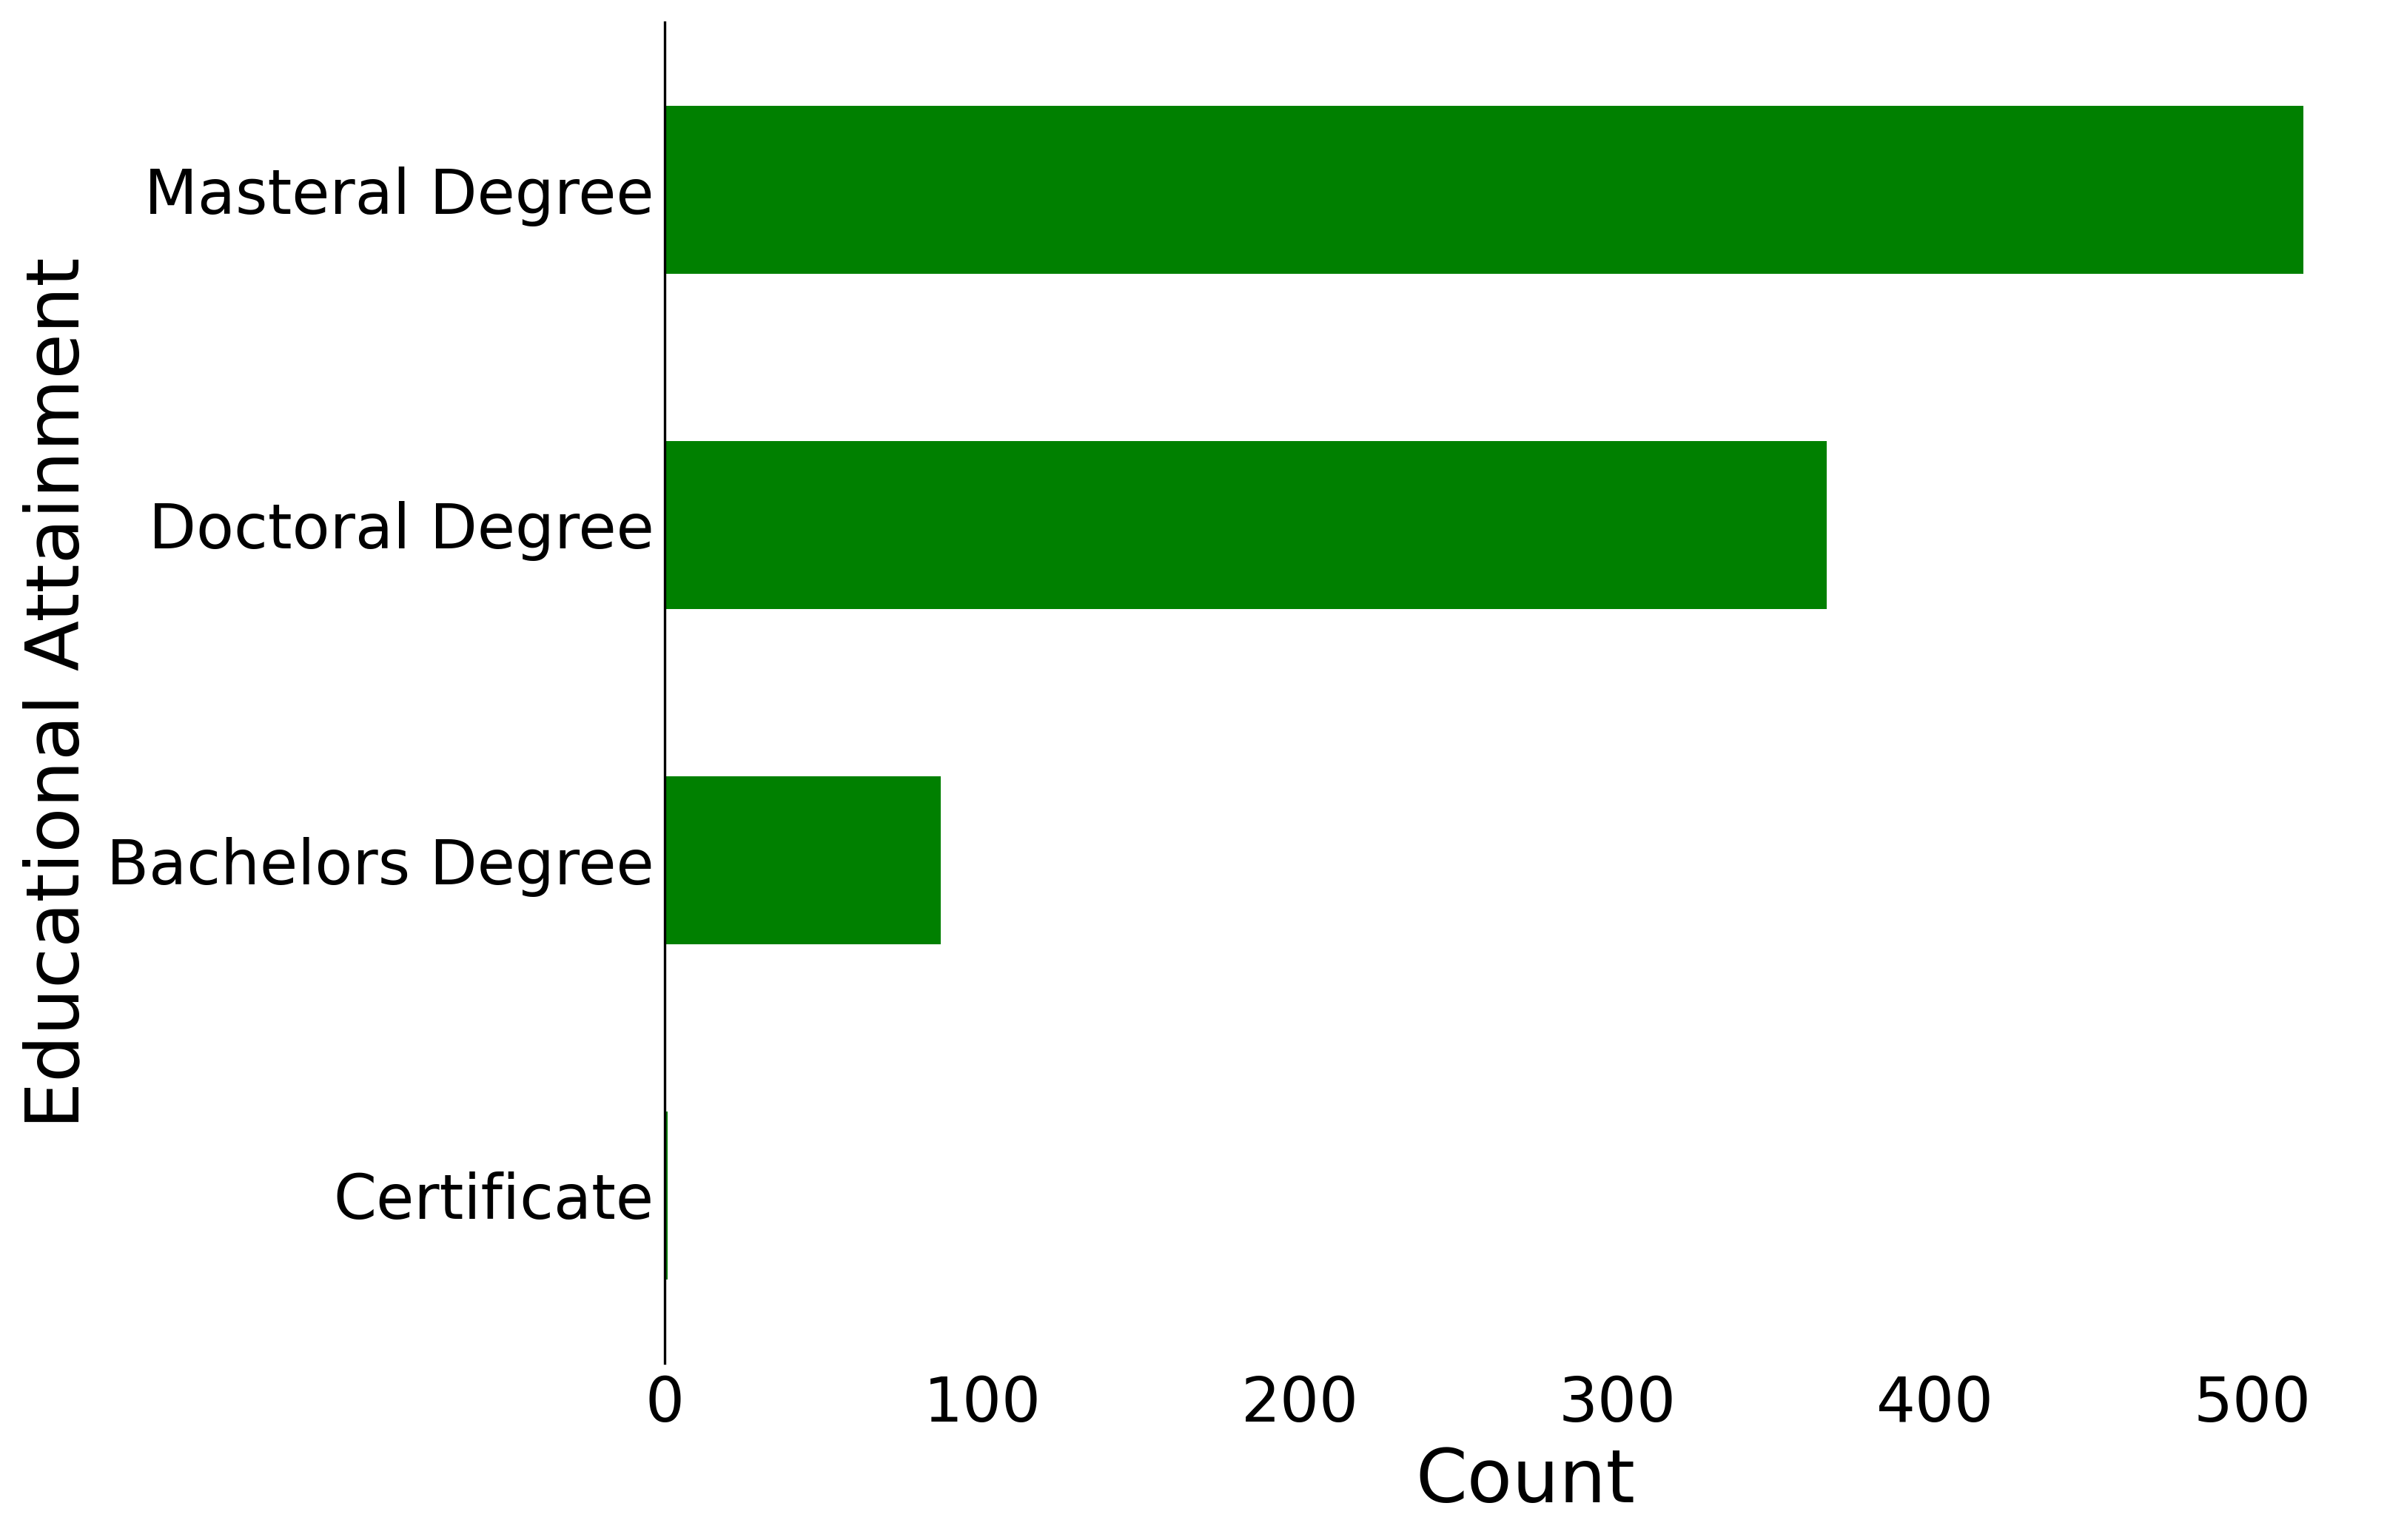

In [22]:
#highest attainment count

plt.figure(figsize=(10, 8), dpi=300)

df_faculty['Educational Attainment'].value_counts().sort_values().plot.barh(color='green')

plt.tick_params(axis='both', which='both', length=0, labelsize=20)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.gca().spines.bottom.set_visible(False)
plt.ylabel('Educational Attainment', fontsize=24)
plt.xlabel('Count', fontsize=24)
plt.show()

In [23]:
df_faculty['Position'].value_counts().sort_values(ascending=False)

Instructor                      355
Assistant Professor             151
Associate Professor             149
Professor                        50
Clinical Associate               18
Research Assistant Professor      5
Research Professor                4
Medical Specialist                3
Adjunct Professor                 2
Professor Emeritus                1
Affiliate Faculty                 1
Professorial Lecturer             1
University Researcher             1
Clinical Assistant                1
Name: Position, dtype: int64

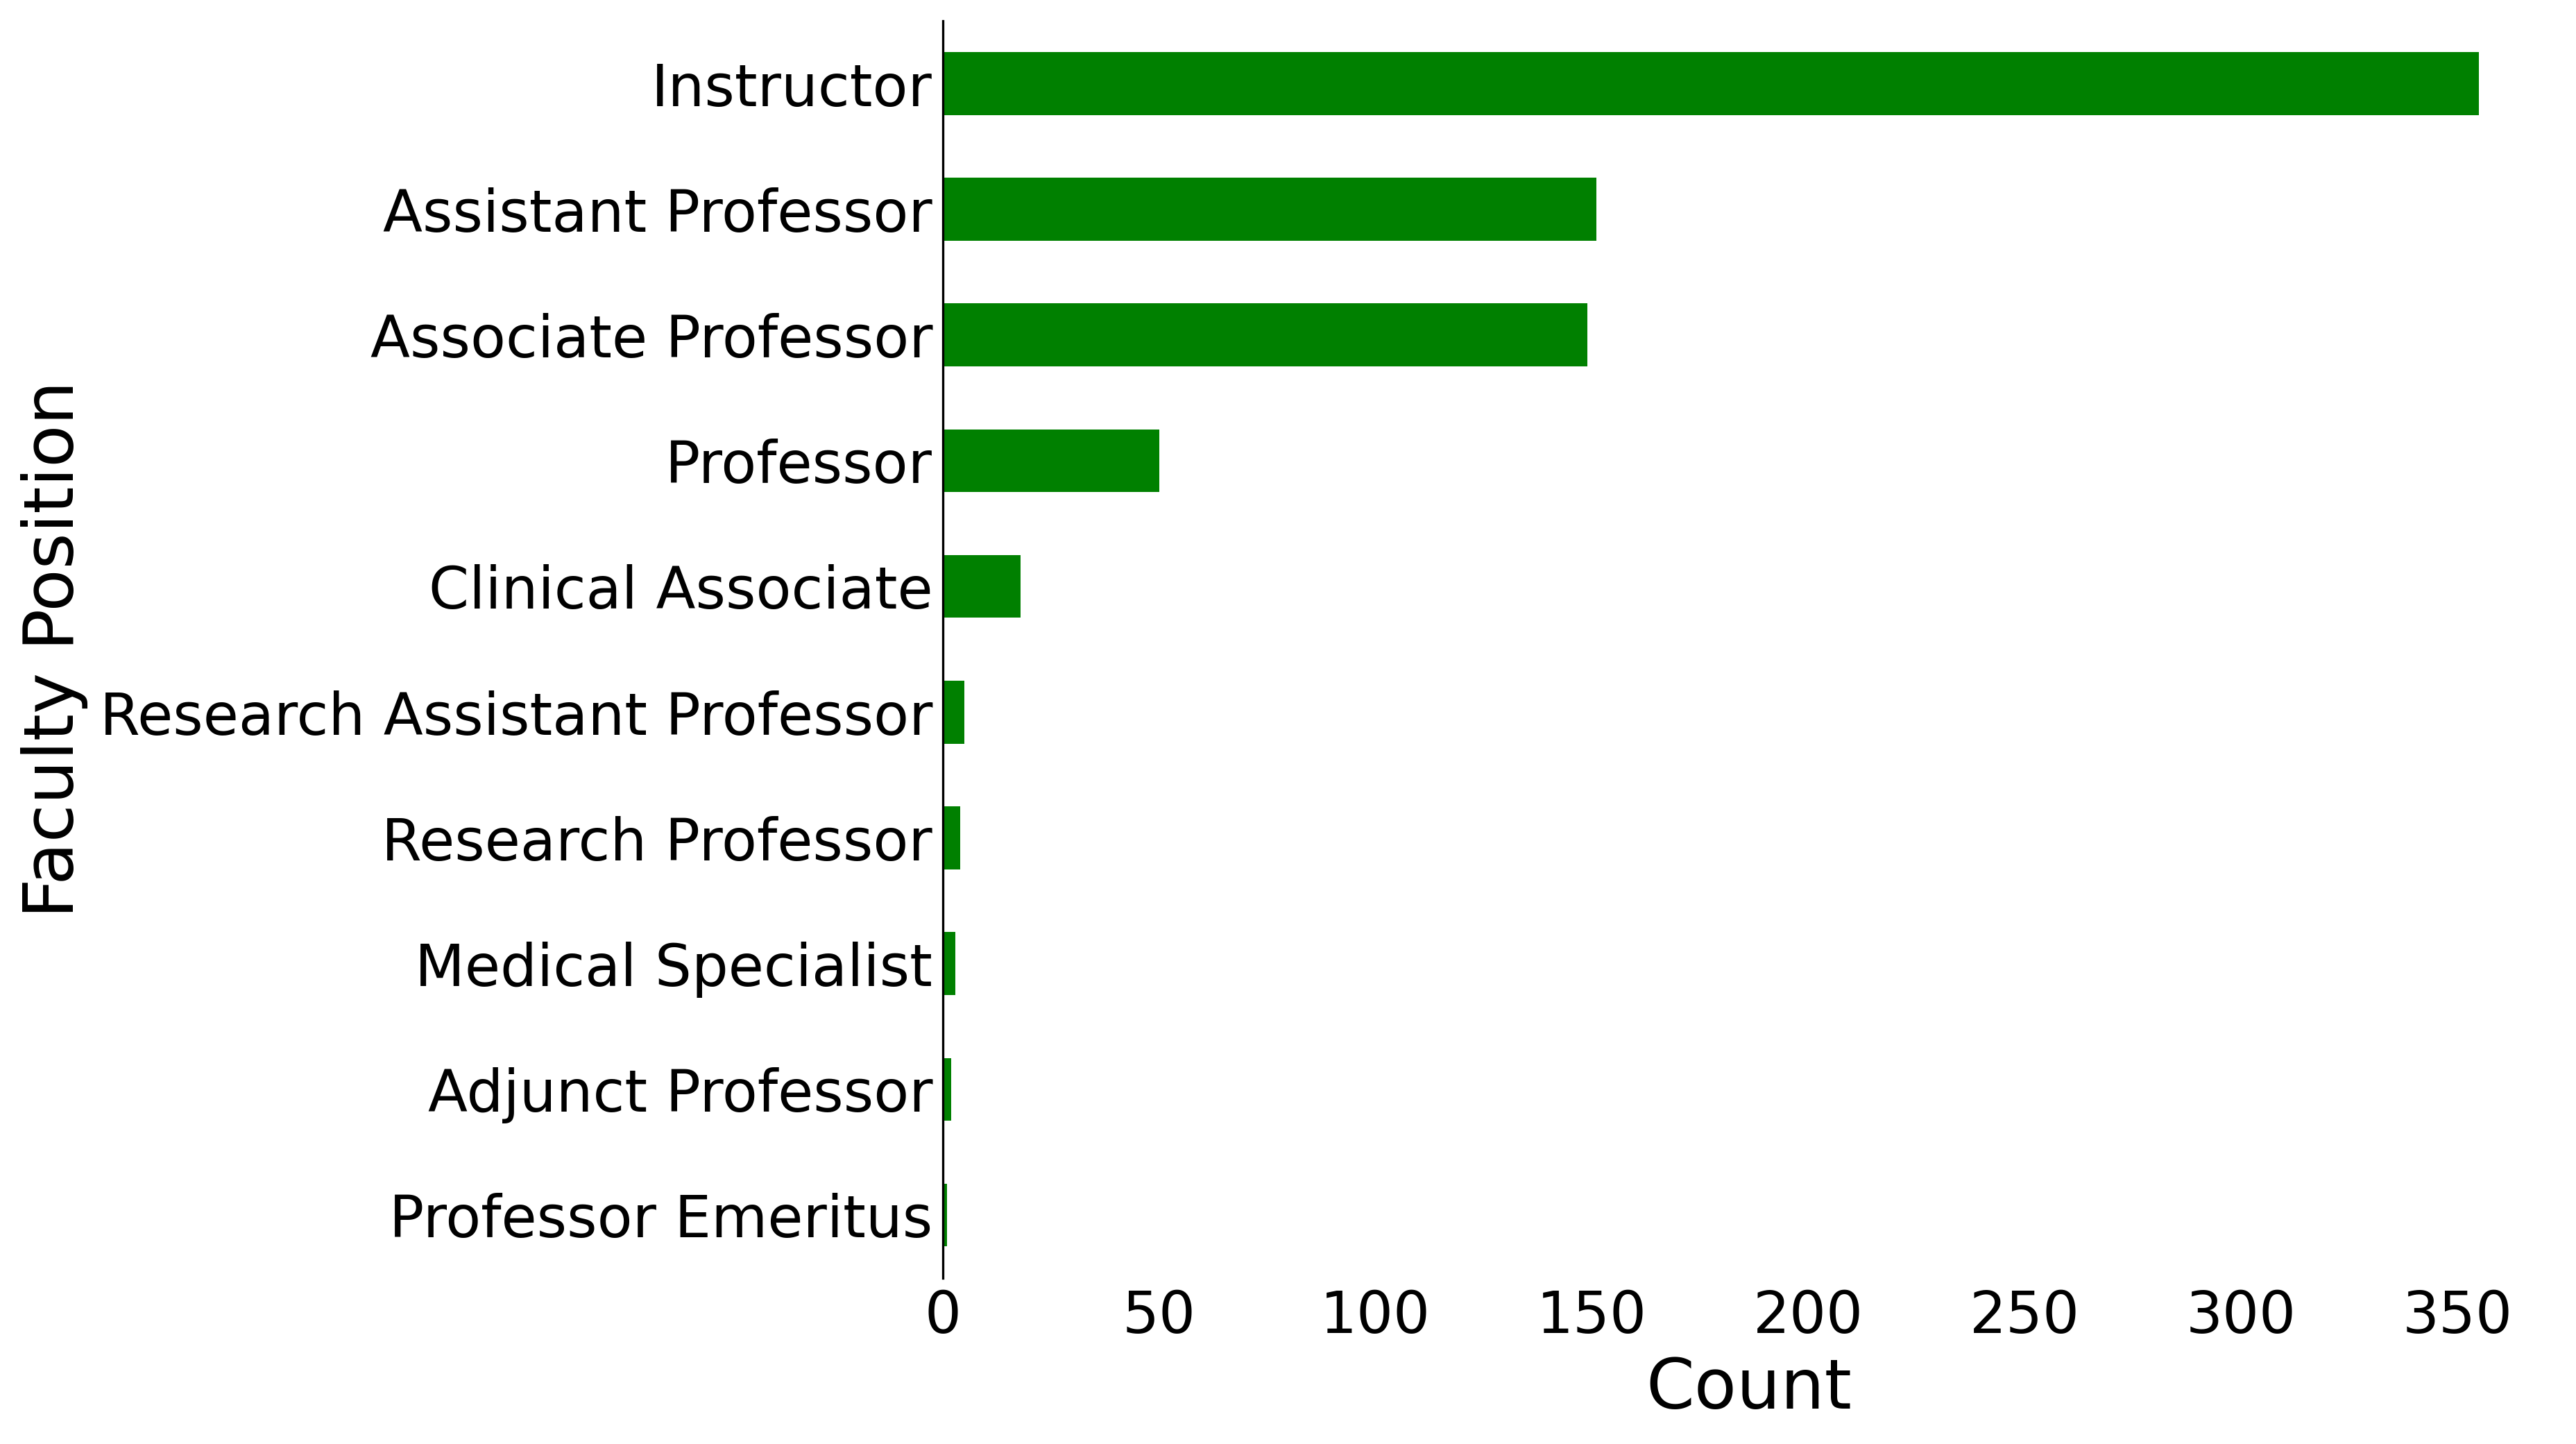

In [24]:
#faculty position count

plt.figure(figsize=(10, 8), dpi=300)

(df_faculty['Position'].value_counts().sort_values(ascending=False)
 .head(10).sort_values(ascending=True).plot.barh(color='green'))

plt.tick_params(axis='both', which='both', length=0, labelsize=20)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.gca().spines.bottom.set_visible(False)
plt.ylabel('Faculty Position', fontsize=24)
plt.xlabel('Count', fontsize=24)
plt.show()

In [25]:
df_faculty['Position'].value_counts()

Instructor                      355
Assistant Professor             151
Associate Professor             149
Professor                        50
Clinical Associate               18
Research Assistant Professor      5
Research Professor                4
Medical Specialist                3
Adjunct Professor                 2
Professor Emeritus                1
Affiliate Faculty                 1
Professorial Lecturer             1
University Researcher             1
Clinical Assistant                1
Name: Position, dtype: int64

In [26]:
doc_exp = []
mas_exp = [] 
bac_exp = [] 

for i in range(0, len(df_faculty)):
    if type(df_faculty['Doctoral'][i]) == float:
        pass
    else:
        for entry in df_faculty['Doctoral'][i].split(';'):
            if entry == '':
                pass
            else:
                doc_exp.append(entry.strip())
            
    if type(df_faculty['Masteral'][i]) == float:
        pass
    else:
        for entry in df_faculty['Masteral'][i].split(';'):
            if entry == '':
                pass
            else:
                mas_exp.append(entry.strip())
            
    if type(df_faculty['Bachelors'][i]) == float:
        pass
    else:
        for entry in df_faculty['Bachelors'][i].split(';'):
            if entry == '':
                pass
            else:
                bac_exp.append(entry.strip())

In [27]:
import collections

doc_counter=collections.Counter(doc_exp)
mas_counter=collections.Counter(mas_exp)
bac_counter=collections.Counter(bac_exp)

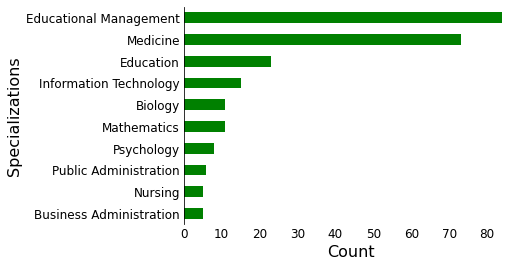

In [28]:
#phd specialization count

doc_df = pd.DataFrame.from_dict(doc_counter, orient='index')
doc_df.columns = ['count']

(doc_df.sort_values(by='count', ascending=False).head(10)
 .sort_values(by='count').plot.barh(legend=None,color='green'))

plt.tick_params(axis='both', which='both', length=0, labelsize=12)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.gca().spines.bottom.set_visible(False)
plt.ylabel('Specializations', fontsize=16)
plt.xlabel('Count',fontsize=16)
plt.show();

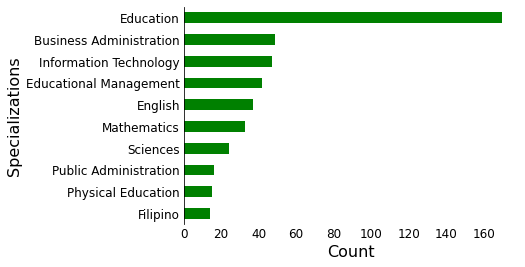

In [29]:
#masters specialization count

mas_df = pd.DataFrame.from_dict(mas_counter, orient='index')
mas_df.columns = ['count']

(mas_df.sort_values(by='count', ascending=False).head(10)
 .sort_values(by='count').plot.barh(legend=None, color='green'))

plt.tick_params(axis='both', which='both', length=0, labelsize=12)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.gca().spines.bottom.set_visible(False)
plt.ylabel('Specializations', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.show()

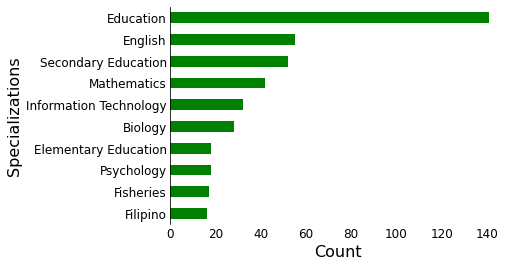

In [30]:
#bachelors specialization count

bac_df = pd.DataFrame.from_dict(bac_counter, orient='index')
bac_df.columns = ['count']

(bac_df.sort_values(by='count', ascending=False).head(10)
 .sort_values(by='count').plot.barh(legend=None, color='green'))

plt.tick_params(axis='both', which='both', length=0, labelsize=12)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.gca().spines.bottom.set_visible(False)
plt.ylabel('Specializations', fontsize=16)
plt.xlabel('Count', fontsize=16)
plt.show()